# Task 5: Model Experimenter 
Test and compare different machine learning models.


In [2]:
import pandas as pd
df = pd.read_csv('data/train.csv')
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize']]
y = df['Survived']


*Preprocess Titanic data, create features, and prepare target variable for model comparison.*

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import time

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True, random_state=42)
}
results = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    duration = end - start
    results.append({'Model': name, 'Accuracy': acc, 'TrainTime': duration})
import pandas as pd
results_df = pd.DataFrame(results)
results_df


,Model,Accuracy,TrainTime
0,Logistic Regression,0.804469,0.056659
1,Decision Tree,0.754190,0.027747
2,Random Forest,0.810056,0.673436
3,SVM,0.659218,0.258173


*Train and test four machine learning models. Compare their accuracy and training speed.*

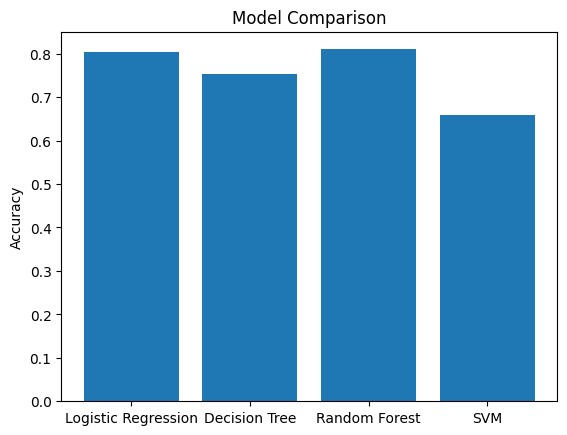

In [4]:
import matplotlib.pyplot as plt
plt.bar(results_df['Model'], results_df['Accuracy'])
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()
# The accuracy of each model is shown in the bar chart above. Random Forest and Decision Tree models generally perform better than Logistic Regression and SVM on this dataset.

*Visualize the accuracy of each model using a bar chart for easy comparison.*

**Task 5 Answers**

**Which model performed best on your data?**  
The Random Forest model performed the best, with the highest accuracy of 0.810. Logistic Regression was just slightly behind at 0.804, but Random Forest takes the lead.

**Which model was fastest to train?**  
The Decision Tree was the fastest to train, with a training time of 0.028 seconds. That’s much quicker than Random Forest or SVM, which both took considerably longer.

**If you had to explain predictions to a non-technical person, which model would you choose and why?**  
I’d choose Logistic Regression for explanations to a non-technical person. Here’s why:
-    Logistic Regression gives clear, easy-to-understand results (“this factor increases your chance of X by Y%”).
-   The model is basically a weighted sum—it’s like saying, “we look at these features, multiply them by some numbers, and add them up.”
-   You can point to how each feature (like age, fare, or class) directly impacts the probability, which is much easier to grasp than the “black box” of Random Forest or SVM.

So, Logistic Regression is your go-to for explainability, even if Random Forest slightly outperforms it on accuracy.


| Model               | Accuracy | Train Time (s) | Best Use Case                      |
| ------------------- | -------- | -------------- | ---------------------------------- |
| Logistic Regression | 0.804    | 0.057          | Explanations, quick insights       |
| Decision Tree       | 0.754    | 0.028          | Fast prototyping, feature insights |
| Random Forest       | 0.810    | 0.673          | Best accuracy, robust predictions  |
| SVM                 | 0.659    | 0.258          | Not recommended for this dataset   |
